<a href="https://colab.research.google.com/github/YaduSM001/Datascience-assignment/blob/main/Daily_Task_UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Preprocessing**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering

# Loading the dataset
data = pd.read_csv('/content/fish (1).csv')

In [45]:
data

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2
...,...,...,...,...,...,...,...
79,Pike,950.0,48.3,51.7,55.1,16.2,11.2
80,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
81,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
82,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [46]:
df = data.copy()

In [47]:
df

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2
...,...,...,...,...,...,...,...
79,Pike,950.0,48.3,51.7,55.1,16.2,11.2
80,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
81,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
82,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bream   84 non-null     object 
 1   242.0   84 non-null     float64
 2   23.2    84 non-null     float64
 3   25.4    84 non-null     float64
 4   30.0    84 non-null     float64
 5   38.4    84 non-null     float64
 6   13.4    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


In [49]:
df.describe()

,242.0,23.2,25.4,30.0,38.4,13.4
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,434.017857,27.388095,29.607143,33.157143,27.953571,12.859524
std,382.648669,11.348058,12.249630,13.272086,10.351142,2.129377
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.325000,20.950000,23.550000,16.875000,10.875000
50%,390.000000,28.450000,30.850000,35.050000,26.900000,13.700000
75%,657.500000,32.725000,36.000000,40.675000,39.225000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [50]:
df.isna().sum()

,0
Bream,0
242.0,0
23.2,0
25.4,0
30.0,0
38.4,0
13.4,0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

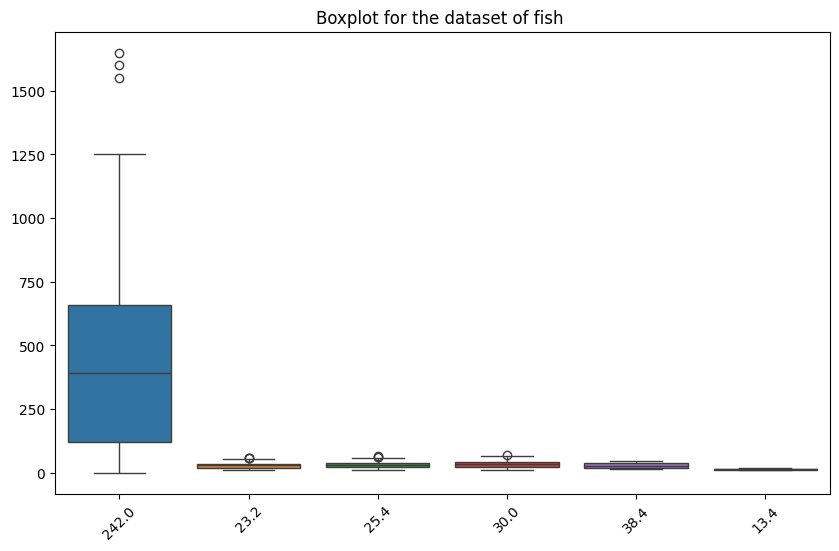

In [51]:
# Boxplot for idedntifying the outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot for the dataset of fish ')
plt.show()

In [52]:
outliers = ['242.0',	'23.2',	'25.4',	'30.0',	'38.4',	'13.4']
for col in outliers:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  df[col] = df[col].clip(lower = lower_limit, upper = upper_limit)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

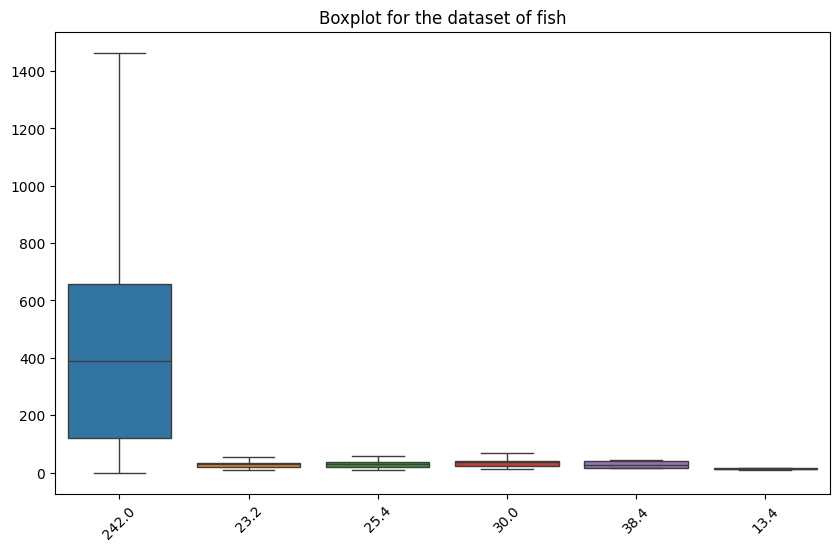

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot for the dataset of fish')
plt.xticks(rotation=45)
plt.show()

In [54]:
# Encoding the fish name and Scaling the dataset

le = LabelEncoder()
df['Encoded'] = le.fit_transform(df['Bream'])
df_encoded = df.drop(columns = ['Bream'])

# Standard Scaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

In [55]:
df_scaled

array([[-3.80262562e-01, -2.96988061e-01, -2.69255922e-01,
        -1.47434218e-01,  1.17076750e+00,  4.44320022e-01,
        -1.04757506e+00],
       [-2.43626672e-01, -3.06157223e-01, -2.52509973e-01,
        -1.55043142e-01,  1.15132991e+00,  1.05849403e+00,
        -1.04757506e+00],
       [-1.80774163e-01, -8.60973382e-02, -4.31856097e-02,
         2.75710253e-02,  9.76391634e-01,  2.08099251e-01,
        -1.04757506e+00],
       [ 2.31793028e-03, -6.77590145e-02, -4.31856097e-02,
         6.56156435e-02,  8.40328527e-01,  1.05849403e+00,
        -1.04757506e+00],
       [ 5.69722864e-02, -4.02515290e-02,  1.54252120e-02,
         1.18878109e-01,  1.09301715e+00,  6.33296639e-01,
        -1.04757506e+00],
       [ 1.93608177e-01, -4.02515290e-02,  1.54252120e-02,
         1.03660262e-01,  1.27767423e+00,  1.15298234e+00,
        -1.04757506e+00],
       [-1.06990782e-01,  3.31017659e-02,  4.05441356e-02,
         1.41704880e-01,  8.01453353e-01,  2.55343405e-01,
        -1.0475750

In [56]:
scaled_df = pd.DataFrame(df_scaled, columns = df_encoded.columns)

In [57]:
scaled_df

,242.0,23.2,25.4,30.0,38.4,13.4,Encoded
0,-0.380263,-0.296988,-0.269256,-0.147434,1.170768,0.444320,-1.047575
1,-0.243627,-0.306157,-0.252510,-0.155043,1.151330,1.058494,-1.047575
2,-0.180774,-0.086097,-0.043186,0.027571,0.976392,0.208099,-1.047575
3,0.002318,-0.067759,-0.043186,0.065616,0.840329,1.058494,-1.047575
4,0.056972,-0.040252,0.015425,0.118878,1.093017,0.633297,-1.047575
...,...,...,...,...,...,...,...
79,1.423331,1.931118,1.857480,1.671099,-1.142305,-0.784028,-0.158723
80,2.243147,2.270377,2.217518,2.021109,-0.977086,-0.547807,-0.158723
81,2.827265,2.346023,2.433122,2.348293,-1.258931,-1.539934,-0.158723
82,2.827265,2.346023,2.433122,2.348293,-1.258931,-1.539934,-0.158723


## **Unsupervised Learning Algorithm**

In [58]:
# Applying KMeans Clustering

kmeans = KMeans(n_clusters = 3, random_state = 42)
df['KMeans_cluster'] = kmeans.fit_predict(scaled_df)

In [59]:
df

,Bream,242.0,23.2,25.4,30.0,38.4,13.4,Encoded,KMeans_cluster
0,Bream,290.00,24.000,26.300,31.2000,40.0,13.8,0,2
1,Bream,340.00,23.900,26.500,31.1000,39.8,15.1,0,2
2,Bream,363.00,26.300,29.000,33.5000,38.0,13.3,0,2
3,Bream,430.00,26.500,29.000,34.0000,36.6,15.1,0,2
4,Bream,450.00,26.800,29.700,34.7000,39.2,14.2,0,2
...,...,...,...,...,...,...,...,...,...
79,Pike,950.00,48.300,51.700,55.1000,16.2,11.2,1,0
80,Pike,1250.00,52.000,56.000,59.7000,17.9,11.7,1,0
81,Pike,1463.75,52.825,58.575,64.0000,15.0,9.6,1,0
82,Pike,1463.75,52.825,58.575,64.0000,15.0,9.6,1,0


In [60]:
# Agglomerative Clustering

agg_cluster = AgglomerativeClustering(n_clusters = 3)
df['Agglomerative_Cluster'] = agg_cluster.fit_predict(df_scaled)

In [61]:
df

,Bream,242.0,23.2,25.4,30.0,38.4,13.4,Encoded,KMeans_cluster,Agglomerative_Cluster
0,Bream,290.00,24.000,26.300,31.2000,40.0,13.8,0,2,2
1,Bream,340.00,23.900,26.500,31.1000,39.8,15.1,0,2,2
2,Bream,363.00,26.300,29.000,33.5000,38.0,13.3,0,2,2
3,Bream,430.00,26.500,29.000,34.0000,36.6,15.1,0,2,2
4,Bream,450.00,26.800,29.700,34.7000,39.2,14.2,0,2,2
...,...,...,...,...,...,...,...,...,...,...
79,Pike,950.00,48.300,51.700,55.1000,16.2,11.2,1,0,1
80,Pike,1250.00,52.000,56.000,59.7000,17.9,11.7,1,0,1
81,Pike,1463.75,52.825,58.575,64.0000,15.0,9.6,1,0,1
82,Pike,1463.75,52.825,58.575,64.0000,15.0,9.6,1,0,1


In [62]:
# Reducing the dimensions to 2 for visualisation

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df_scaled)

Text(0, 0.5, 'PCA Component 2')

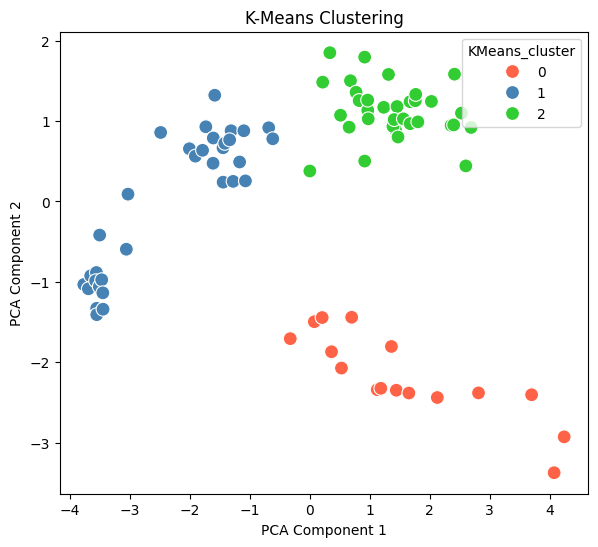

In [63]:
# Plot the clusters for KMeans Clustering

plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)
sns.scatterplot(x = df_pca[:, 0], y = df_pca[:, 1], hue = df['KMeans_cluster'], palette = ['#FF6347', '#4682B4', '#32CD32'], s = 100)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

Text(0, 0.5, 'PCA Component 2')

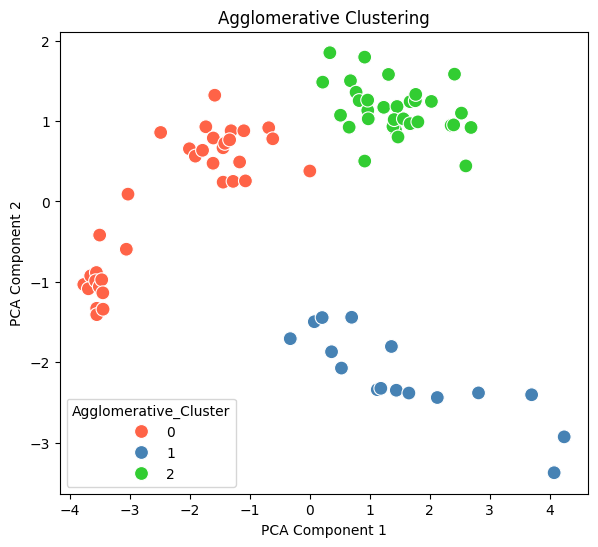

In [64]:
# Ploting the clusters for Agglomerative Clustering

plt.figure(figsize = (15,6))
plt.subplot(1, 2, 2)
sns.scatterplot(x = df_pca[:, 0], y = df_pca[:, 1], hue = df['Agglomerative_Cluster'], palette = ['#FF6347', '#4682B4', '#32CD32'], s = 100)
plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')